<a href="https://colab.research.google.com/github/Je0azul5/IA-ML/blob/main/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importar bibliotecas que necesitamos
# Los paquetes matplotlib y numpy también deben ser importados
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math


In [6]:
# definimos la funcion objeto
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj


In [7]:
# poscicion inicial
x_start = [0.8, -0.5]

In [8]:
# Diseño de variables en los puntos de malla
i1 = np.arange(-1.0, 1.0, 0.01)
i2 = np.arange(-1.0, 1.0, 0.01)
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
             - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
             - 0.1*math.cos(6.0*3.1415*x2m[i][j])


Text(0, 0.5, 'x2')

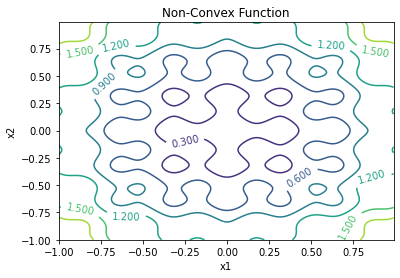

In [9]:
# Se crea la figura
plt.figure()
# Especificar las líneas de contorno
# líneas = rango(2,52,2)
# Contornos de la trama
CS = plt.contour(x1m, x2m, fm)#,lineas)
# Etiquetar los contornos
plt.clabel(CS, inline=1, fontsize=10)
# Agregar un poco de texto a la trama
plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')

In [10]:

##################################################
              # Recocido simulado
##################################################
# Numeros de ciclos
n = 50
# Numeros de intentos por ciclos 
m = 50
# Numero de soluciones aceptadas
na = 0.0
# Probabilidad de aceptar una solución mala al principio
p1 = 0.7
# Probabilidad de aceptar una solución mala al final
p50 = 0.001
# Temperatura inicial
t1 = -1.0/math.log(p1)
# Temperatura final
t50 = -1.0/math.log(p50)
# Reducción fraccionada cada ciclo
frac = (t50/t1)**(1.0/(n-1.0))
# X Inicial
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# Los mejores resultados actuales hasta ahora
xc = np.zeros(2)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Temperatura actual
t = t1
# Promedio DeltaE 
DeltaE_avg = 0.0


In [11]:
for i in range(n):
    print('Cycle: ' + str(i) + ' with Temperature: ' + str(t))
    for j in range(m):
        # Generar nuevos puntos de prueba
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # Clip a los límites superiores e inferiores
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc)
        if (f(xi)>fc):
            # Inicializar DeltaE_avg si se encontró una solución mala
            # en la primera iteración
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # La función del objetivo es peor
            # Generar probabilidad de aceptación
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # Determinar si aceptar un punto peor
            if (random.random()<p):
                # aceptar la peor solución
                accept = True
            else:
                # No acepta la peor solución
                accept = False
        else:
            # La función objetivo es más baja, aceptada automáticamente
            accept = True
        if (accept==True):
            # Actualiza la solución actualmente aceptada
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)
            # Incrementar el número de soluciones aceptadas
            na = na + 1.0
            # Actualizar DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # Registra los mejores valores de x al final de cada ciclo
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # Bajaa la temperatura para el próximo ciclo
    t = frac * t


Cycle: 0 with Temperature: 2.8036732520571284
Cycle: 1 with Temperature: 2.6391299733669826
Cycle: 2 with Temperature: 2.484243487080245
Cycle: 3 with Temperature: 2.33844705087681
Cycle: 4 with Temperature: 2.2012071836732217
Cycle: 5 with Temperature: 2.0720217135717602
Cycle: 6 with Temperature: 1.9504179403723987
Cycle: 7 with Temperature: 1.8359509059241148
Cycle: 8 with Temperature: 1.7282017659866262
Cycle: 9 with Temperature: 1.6267762576450626
Cycle: 10 with Temperature: 1.531303256669716
Cycle: 11 with Temperature: 1.4414334195421339
Cycle: 12 with Temperature: 1.3568379051786155
Cycle: 13 with Temperature: 1.2772071716737936
Cycle: 14 with Temperature: 1.202249843661488
Cycle: 15 with Temperature: 1.1316916461484114
Cycle: 16 with Temperature: 1.0652744009195394
Cycle: 17 with Temperature: 1.002755081842906
Cycle: 18 with Temperature: 0.9439049256171138
Cycle: 19 with Temperature: 0.8885085947077039
Cycle: 20 with Temperature: 0.836363389409508
Cycle: 21 with Temperature: 0.

Best solution: [0.06097232 0.00142888]
Best objective: 0.0628403115155093


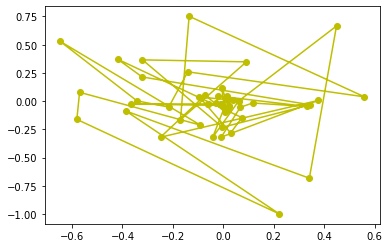

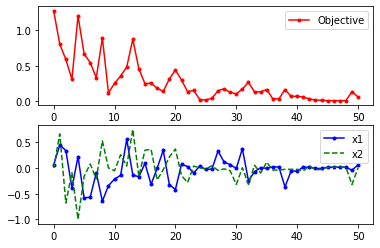

In [12]:

# Imprime solucion
print('Best solution: ' + str(xc))
print('Best objective: ' + str(fc))

plt.plot(x[:,0],x[:,1],'y-o')
plt.savefig('contour.png')

fig = plt.figure()
ax1 = fig.add_subplot(211)
# Grafica de color rojo fs
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
# Grafica de color azul el arreglo de x[:,0]
ax2.plot(x[:,0],'b.-')
# Grafica de color verde el arreglo de x[:,1]
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])

# Guarda la imagen como iterations.png
plt.savefig('iterations.png')

plt.show()